In [1]:
import suaBibSignal as sbs
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
import scipy.io.wavfile as waves
import time

In [2]:
ans = input("Want to hear the audios? Y/n: ")
hear = False
if ans == "y":
    hear = True


Want to hear the audios? Y/n: y


In [3]:
ms = sbs.signalMeu()

fs = ms.freqAmostragem
duration = 4 
t = np.linspace(0, duration, duration*fs)

## Cell for recording the desired audio

In [4]:
for e in range(3):
    print(f"Starting in {3-e}...")
    time.sleep(1)

print("SENTÔ KAISHI!!!")
rec = sd.rec(int(duration*fs), fs, channels=2)
sd.wait()
print("Time's UP!")
waves.write("./rec.wav", fs, rec)


Starting in 3...
Starting in 2...
Starting in 1...
SENTÔ KAISHI!!!
Time's UP!


### Reading audio raw

In [16]:
sd.default.samplerate = fs
sd.default.channels = 1
audio, samplerate = sf.read("rec.wav")
audio = audio[:,1]
if hear:
    sd.play(audio)
    sd.wait()

### Normalizing it, in range [-1,1]

In [6]:
audioNorm = ms.norm(audio)
if hear:
    sd.play(audioNorm)
    sd.wait()

### Filtering it below 4.000Hz

In [7]:
audioNormFilt = ms.LPF(audioNorm, 4000, fs)
if hear:
    sd.play(audioNormFilt)
    sd.wait()

### Modulating with carrior of 14.000Hz

In [8]:
audioMod = ms.modSig(audioNormFilt, fs)
if hear:
    sd.play(audioMod)
    sd.wait()

### Calculating Fourier of changed audios

In [9]:
audioFFT = ms.calcFFT(audio, fs)
audioNormFFT = ms.calcFFT(audioNorm, fs)
audioNormFiltFFT = ms.calcFFT(audioNormFilt, fs)
audioModFFT = ms.calcFFT(audioMod, fs)

### Analizing signal on time and Fourier

Text(0, 0.5, 'Amplitude')

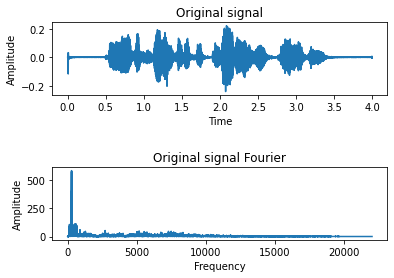

In [10]:
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.title("Original signal")
plt.plot(t, audio)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.title("Original signal Fourier")
plt.plot(audioFFT[0], audioFFT[1])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

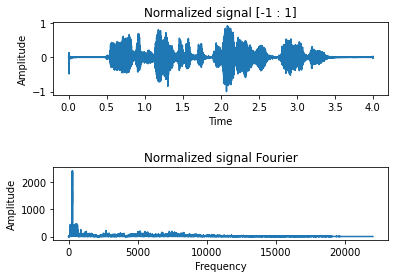

In [11]:
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.title("Normalized signal [-1 : 1]")
plt.plot(t, audioNorm)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.title("Normalized signal Fourier")
plt.plot(audioNormFFT[0], audioNormFFT[1])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

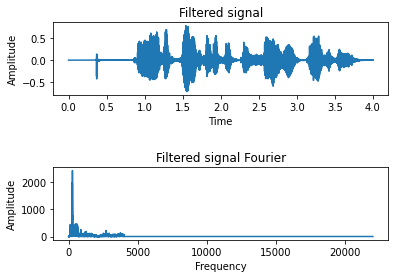

In [12]:
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.title("Filtered signal")
plt.plot(t, audioNormFilt)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.title("Filtered signal Fourier")
plt.plot(audioNormFiltFFT[0], audioNormFiltFFT[1])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

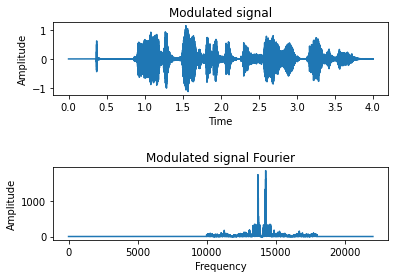

In [13]:
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.title("Modulated signal")
plt.plot(t, audioMod)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.title("Modulated signal Fourier")
plt.plot(audioModFFT[0], audioModFFT[1])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

In [15]:
audioDMod = ms.LPF(ms.modSig(audioMod, fs), 4000, fs)
audioDModFFT = ms.calcFFT(audioDMod, fs)
if hear:
    sd.play(audioDMod)
    sd.wait()

Text(0, 0.5, 'Amplitude')

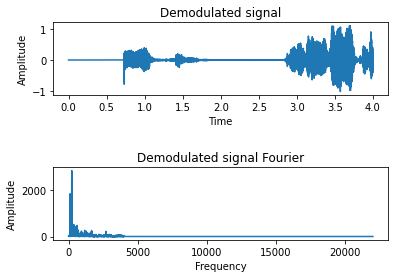

In [15]:
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.title("Demodulated signal")
plt.plot(t, audioDMod)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.title("Demodulated signal Fourier")
plt.plot(audioDModFFT[0], audioDModFFT[1])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")